In [48]:
import pandas as pd #pandas (pd): Data manipulation ke liye use hota hai, jaise CSV file load karna aur process karna.
import numpy as np
import matplotlib.pyplot as plt


In [49]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')
#encoding='latin-1': Special characters ko properly read karne ke liye encoding use hui hai
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let’s start by looking at the descriptive statistics of the dataset

In [50]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis
according to time periods. So let’s add these columns:

In [51]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

In [53]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.


In [54]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Adding New Date-Based Columns

In [55]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

#Order Month: Order date se month extract karte hain.
#Order Year: Order date se year extract hota hai.
#Order Day of Week: Week ka day (0 for Monday, 6 for Sunday) extract kiya gaya hai.

In [56]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Monthly Sales Analysis

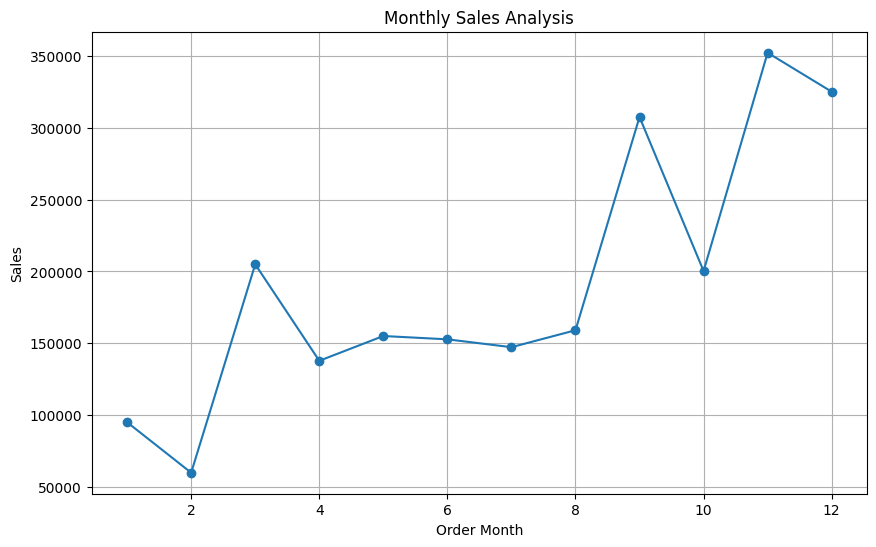

In [57]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Order Month'], sales_by_month['Sales'], marker='o')
plt.title('Monthly Sales Analysis')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [58]:
#Data Grouping:
#data.groupby('Order Month')['Sales'].sum() se har month ki total sales nikalte hain.
#.reset_index() data ko structured format me rakhta hai.
#px.line: Monthly sales trend show karne ke liye line chart banaya gaya hai.
#fig.show(): Graph display karta hai.


# Sales Analysis by Category

In [59]:
#groupby('Category'): Category-wise sales nikalte hain.
#Pie Chart:
#px.pie: Sales proportions ko pie chart me show karta hai.
#hole=0.5: Donut-style chart banata hai.
#Pastel Colors: Chart me soft color palette use kiya gaya hai.


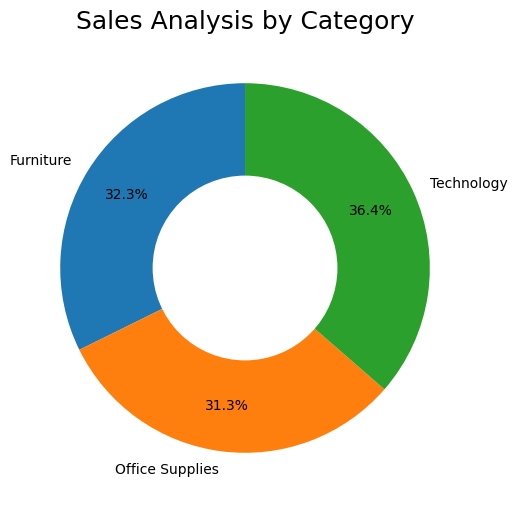

In [60]:
import matplotlib.pyplot as plt

# Group sales by category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Extract values
labels = sales_by_category['Category']
sizes = sales_by_category['Sales']

# Create donut pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',     # percentage inside slices
    startangle=90,
    pctdistance=0.75,
)


# Draw white circle for "donut hole"
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title("Sales Analysis by Category", fontsize=18)


plt.show()


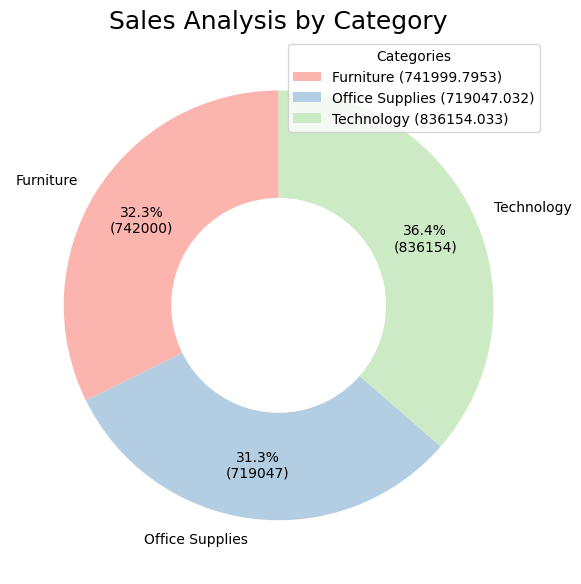

In [61]:
import matplotlib.pyplot as plt

# Group sales by category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Extract values
labels = sales_by_category['Category']
sizes = sales_by_category['Sales']

# Custom function for labels (percentage + actual sales)
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Create donut pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: func(pct, sizes),  # show % + actual sales
    startangle=90,
    pctdistance=0.75,
    colors=plt.cm.Pastel1.colors
)

# Style labels
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)


ax.legend(
    wedges,                       # use slices for legend handles
    [f"{l} ({v})" for l, v in zip(labels, sizes)],   # Category + Sales value
    title="Categories",
    loc="best", # position legend outside
)


# Donut hole
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title("Sales Analysis by Category", fontsize=18)

plt.tight_layout()
plt.show()


# Sales Analysis by Sub-Category

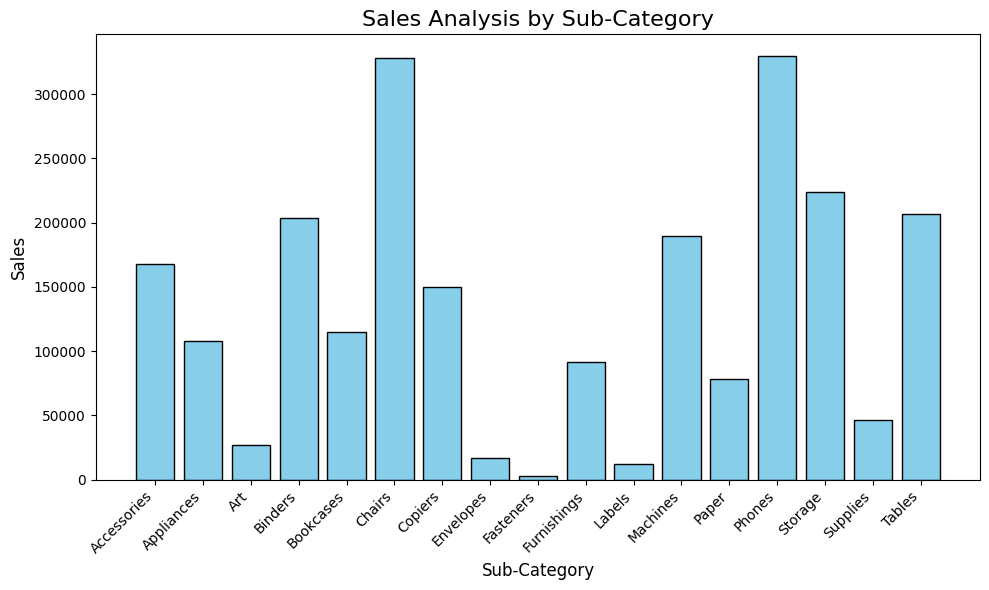

In [62]:
# Group sales by Sub-Category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Extract values
x = sales_by_subcategory['Sub-Category']
y = sales_by_subcategory['Sales']

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(x, y, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Sales Analysis by Sub-Category", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Monthly Profit Analysis

In [63]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month,
              x='Order Month',
              y='Profit',
              title='Monthly Profit Analysis')
fig.show()

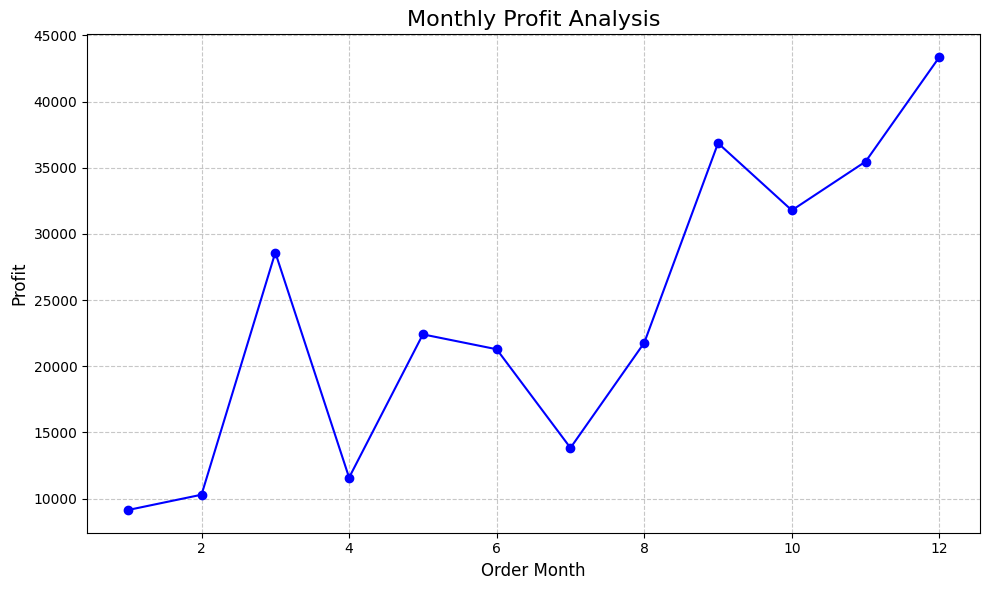

In [64]:
import matplotlib.pyplot as plt

# Group profit by month
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

# Extract values
x = profit_by_month['Order Month']
y = profit_by_month['Profit']

# Create line chart
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Monthly Profit Analysis", fontsize=16)

# Show grid for clarity
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Profit Analysis by Category

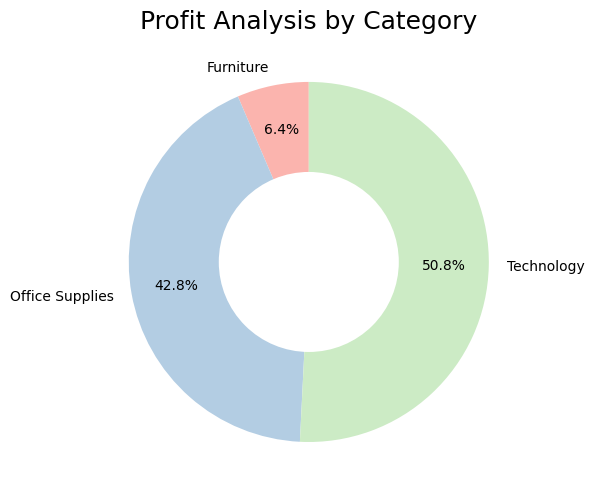

In [65]:
import matplotlib.pyplot as plt

# Group profit by category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# Extract values
labels = profit_by_category['Category']
sizes = profit_by_category['Profit']

# Create donut pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',     # percentage + label inside
    startangle=90,
    pctdistance=0.75,
    colors=plt.cm.Pastel1.colors
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title("Profit Analysis by Category", fontsize=18)

plt.tight_layout()
plt.show()


# Profit Analysis by Sub-Category

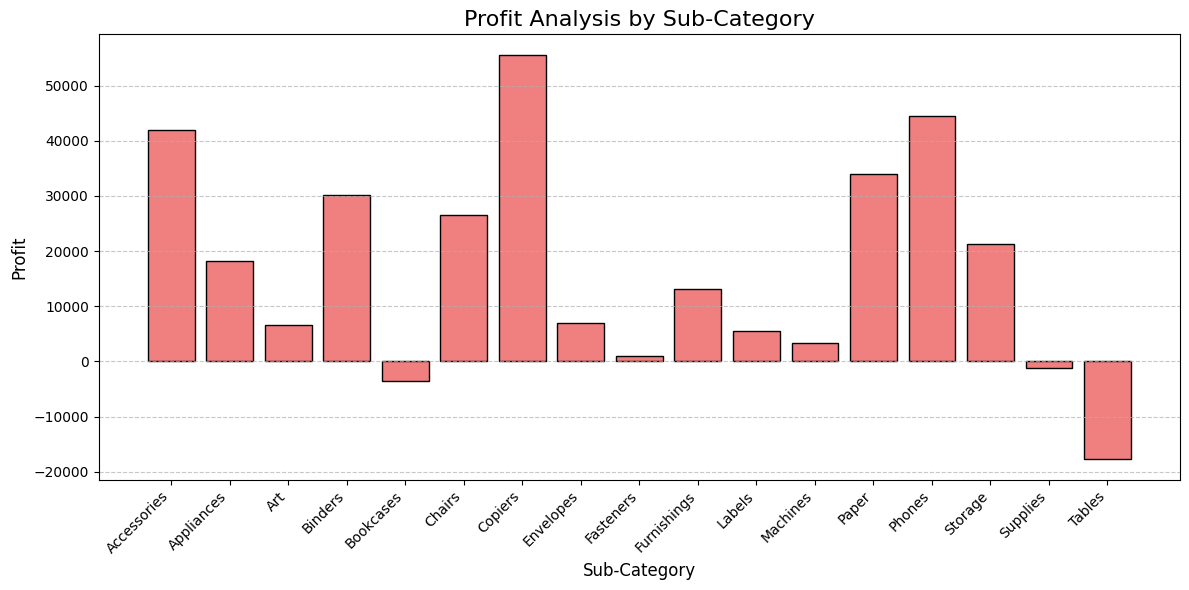

In [66]:
import matplotlib.pyplot as plt

# Group profit by Sub-Category
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# Extract values
x = profit_by_subcategory['Sub-Category']
y = profit_by_subcategory['Profit']

# Create bar chart
plt.figure(figsize=(12,6))
plt.bar(x, y, color='lightcoral', edgecolor='black')

# Labels and title
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Profit Analysis by Sub-Category", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Sales and Profit Analysis by Customer Segment

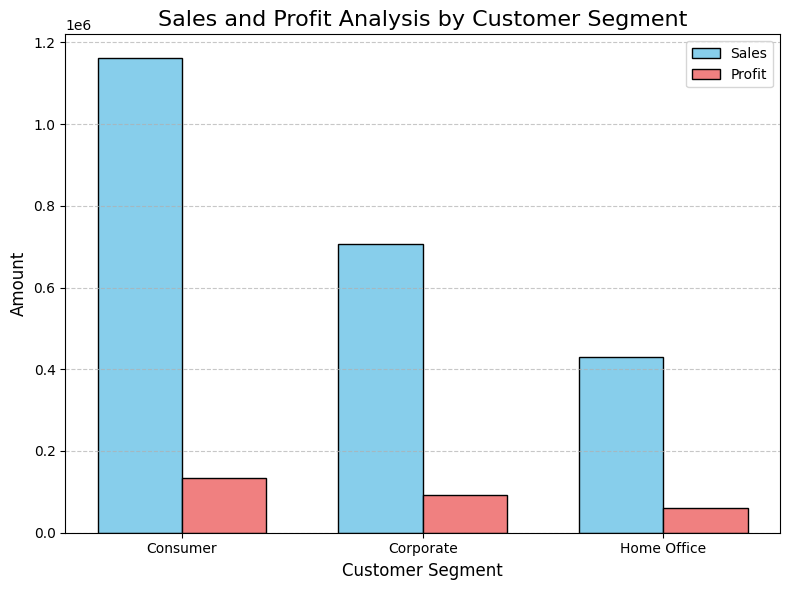

In [67]:
# Group sales & profit by segment
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Extract values
segments = sales_profit_by_segment['Segment']
sales = sales_profit_by_segment['Sales']
profit = sales_profit_by_segment['Profit']

# Define bar width & positions
x = np.arange(len(segments))  # positions for bars
width = 0.35  # width of each bar

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, sales, width, label='Sales', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, profit, width, label='Profit', color='lightcoral', edgecolor='black')

# Labels & Title
ax.set_xlabel("Customer Segment", fontsize=12)
ax.set_ylabel("Amount", fontsize=12)
ax.set_title("Sales and Profit Analysis by Customer Segment", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(segments)

# Add legend
ax.legend()

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# analyse sales-to-profit ratio

In [68]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
